## What is Support Vector Machines(SVM)?

Support vector is a supervised machine learning algorithm which can be used as both classification and regression problems,however it is mostly used in classification problems.In SVM we plot each data item as a point in n dimensional space where n is the number of features you have with the value of each feature being the value of particular coordinate,we perform classification by finding a`hyperplane` the differentiates the two classes very well.
<img src='svmc.JPG'>
As you see there are two class in the above figure one is that is separable using decision boundary that is called `HyperPlane` there is another two planes present parallel to hyperplane are that ploted along nearest class elements we called them support vectors.
All right side points(xi,xj) of hyper plane will give positive value of y
means
\begin{align*}
f(xi,xj) &= W^TX+b
\end{align*}
will be positive so we represent as it `positive plane` and write in simply in this way
\begin{align*}
    f(xi,xj) = y = W^TX+b = 1
\end{align*}
same story for left side points of hyperplane also which we call `negative plane` also represent as
\begin{align*}
    f(xi,xj) = y = W^TX+b = -1
\end{align*}
the distance between these planes is called margin, for good model margin value should always high.

### So here we discuss three concepts
- Hyperplane (decision boundary)
- Marginal plane (Positive and Negative plane)
- Margin (Distance b/w two plane)

#### all you read and learn above was for linearly distributed data,now let's suppose you have a `Non-linear` data then,`how you find hyperplane?`
We can solve this problem by changing dimensional of palne,how is this possible?
<img src='kernel.JPG'>
<img src='3d.png'>
as you can see this image in case of dimension space x1,x2 black & red color data or classes are seperate with circle but we can not differentiate classes using a linear plane but as soon as we change dimensions(x1^2,x2^2) classes are separable easily.
We use kernel function to change dimension in to high dimensions this function corresponds to a `dot product` of `two feature` vectors in Some `Expanded Features space`
    \begin{align*}
       k(xa,xb) = Φ(xa).Φ(xb)
    \end{align*}
    
## Some examples of SVM Kernel Functions that are quite popular are 
- ### Linear Kernel Function
#### \begin{align*} k(xi,xj) = xi.xj \end{align*}
- ### Polynomial of power p: Kernel Function
#### \begin{align*} k(xi,xj) = (1+xi.xj)^p \end{align*}
- ### Radial Basis Function(Gaussian)
#### \begin{align*} k(xi,xj) = exponential(-||xi-xj||)^2)/2 σ^2)\end{align*}
where  σ =  Standard Deviation 
- ### Sigmoid Kernel Function
#### \begin{align*} k(xi,xj) = tanh(γxi.xj+c)\end{align*}














### Let's Build Model 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
cancer = datasets.load_breast_cancer()

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [7]:
# classes are 0 or 1
# 0 = malignant
# 1 = benign
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
cancer.feature_names.shape

(30,)

In [11]:
X = cancer.data
y = cancer.target
X.shape,y.shape

((569, 30), (569,))

In [12]:
cancer.filename

'c:\\python38\\lib\\site-packages\\sklearn\\datasets\\data\\breast_cancer.csv'

## Standardization (All data in to same scale for better accuracy)

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

### Split the data and build the model

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=1,stratify=y)

In [16]:
from sklearn import svm

### Linear Kernel

In [28]:
clf = svm.SVC(kernel = 'linear')

In [29]:
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)
print('Accuracy:',metrics.accuracy_score(y_test,y_predict))
print('precision:',metrics.precision_score(y_test,y_predict))
print('recall:',metrics.recall_score(y_test,y_predict))


Accuracy: 0.9912280701754386
precision: 0.9863013698630136
recall: 1.0


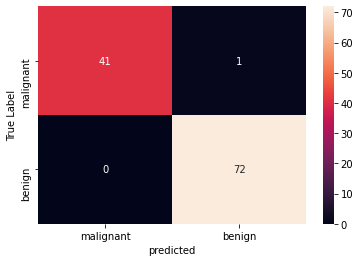

In [30]:
mat = metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(mat,annot=True,xticklabels = cancer.target_names,
yticklabels = cancer.target_names)
plt.xlabel('predicted')
plt.ylabel('True Label')
plt.show()

In [31]:
element,count = np.unique(y_test,return_counts=True)
element,count

(array([0, 1]), array([42, 72]))

## Polynomial Kernel

In [32]:
clf = svm.SVC(kernel = 'poly',degree=4,gamma=100)

In [33]:
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)
print('Accuracy:',metrics.accuracy_score(y_test,y_predict))
print('precision:',metrics.precision_score(y_test,y_predict))
print('recall:',metrics.recall_score(y_test,y_predict))


Accuracy: 0.7894736842105263
precision: 0.8243243243243243
recall: 0.8472222222222222


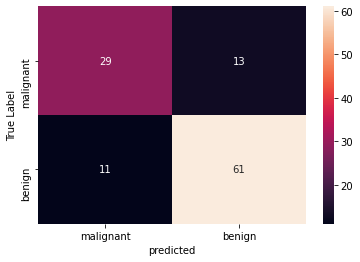

In [34]:
mat = metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(mat,annot=True,xticklabels = cancer.target_names,
yticklabels = cancer.target_names)
plt.xlabel('predicted')
plt.ylabel('True Label')
plt.show()

## Sigmoid Kernel

In [35]:
clf = svm.SVC(kernel = 'sigmoid',gamma=100,C=.2)

<img src='hl.JPG'>
The Gamma parameter defines how much influence a training example has. For example, if gamma is high only the nearest points from the decision boundary are considered for calculating distances, but if gamma is low even farther points from the decision boundary are also considered.  
<img src='hlr.JPG'>
The Regularization Parameter C is basically how much we want to avoid misclassification of points. If C is very large (infinite) we get the perfect classification of training samples smaller margin is considered, but if C is very small(0) it will cause the optimizer to find the maximum margin classifier even though it `misclassified some points`. Hence we have a find a good value of C in between.

  

In [36]:
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)
print('Accuracy:',metrics.accuracy_score(y_test,y_predict))
print('precision:',metrics.precision_score(y_test,y_predict))
print('recall:',metrics.recall_score(y_test,y_predict))


Accuracy: 0.9035087719298246
precision: 0.9420289855072463
recall: 0.9027777777777778


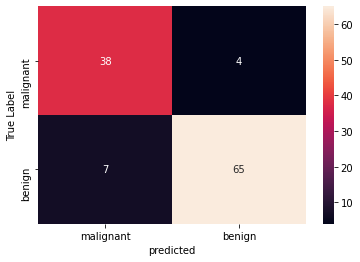

In [37]:
mat = metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(mat,annot=True,xticklabels = cancer.target_names,
yticklabels = cancer.target_names)
plt.xlabel('predicted')
plt.ylabel('True Label')
plt.show()